# import libraries

In [463]:
import pickle
import sklearn
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA, PCA
from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection  import learning_curve

# Load data

In [464]:
# big_matrix = pickle.load(open("big_matrix.p", 'rb')) 
# normalized_matrix = pickle.load(open("big_matrix.p", 'rb')) 
normalized_matrix = pickle.load(open("normalized_matrix.p", 'rb')) 
y=pickle.load(open("labels.p", 'rb')) 

In [465]:
# a=np.arange(17,1440,18)
# indices_to_delete = a
# normalized_matrix = np.delete(normalized_matrix, indices_to_delete, axis=0)
normalized_matrix_t=normalized_matrix.transpose()
# print(big_matrix_t.shape)
print(normalized_matrix.shape)
print(normalized_matrix_t.shape)

(1440, 296)
(296, 1440)


# PCA

In [466]:
n=15
pca=PCA(n_components=0.85) #PCA
X=normalized_matrix_t
X_t=pca.fit_transform(X)
print(X_t.shape)
X_range=np.arange(1,X_t.shape[1]+1,1)
print("Explained Variance for first first 10 principle components: ",pca.explained_variance_ratio_[:15])

(296, 9)
Explained Variance for first first 10 principle components:  [0.38755368 0.30825035 0.0527822  0.02475482 0.0225252  0.01595835
 0.01506364 0.01332419 0.01173676]


Text(0, 0.5, 'Percentage of variance explained')

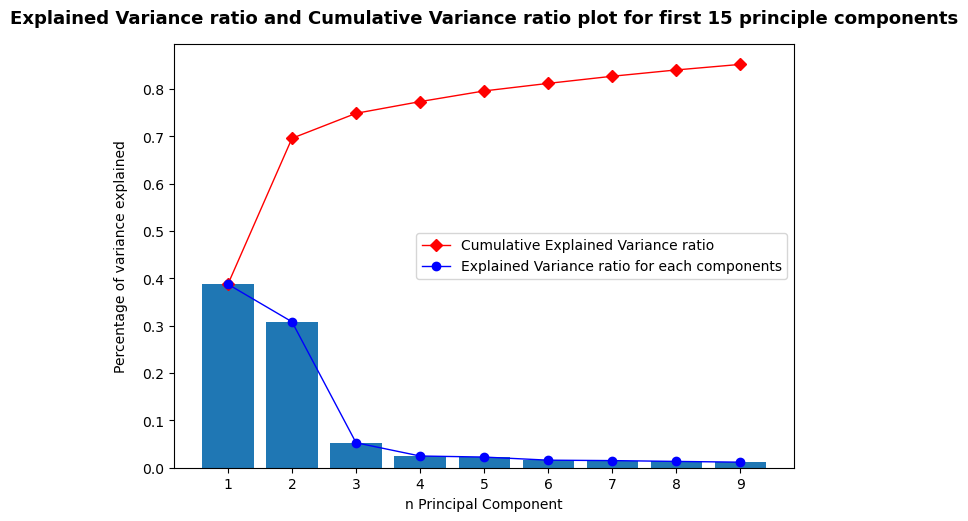

In [467]:
# fig, axarr = plt.subplots(2, 4, figsize=(12, 6))
plt.figure(figsize=(8,5.5))
plt.plot(X_range, np.cumsum(pca.explained_variance_ratio_[:15]),marker="D",c="red",linewidth=1,label="Cumulative Explained Variance ratio")
plt.bar(X_range,pca.explained_variance_ratio_[:15])
plt.plot(X_range, pca.explained_variance_ratio_[:15],marker="o",c="blue",linewidth=1,label="Explained Variance ratio for each components")
plt.legend(loc='center right')
plt.xticks(X_range)
plt.title("Explained Variance ratio and Cumulative Variance ratio plot for first 15 principle components",fontsize = 13,y=1.03,fontweight = 'bold')
plt.xlabel('n Principal Component', fontsize = 10)
plt.ylabel('Percentage of variance explained', fontsize = 10,labelpad=10)

In [468]:
# plt.figure(figsize=(8,5.5))

# color= ['red' if l =="correct" else "pink" if l =="incorrect_out_knees" else "blue" if l =="incorrect_lean_fwd" else "purple" if l =="incorrect_not_low" else "red" if l =="incorrect_chin_tuck" else "yellow" if l =="incorrect_feet_close" else 'green' for l in y]
# plot=plt.scatter(X_t[:,0],X_t[:,1],c=color,cmap=plt.cm.coolwarm, alpha=1,marker=".",s=2,)
# clb = plt.colorbar(plot)
# plt.xlabel("first principle component", fontsize=12)
# plt.ylabel("second principle component", fontsize=12)
# plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)
# plt.show()

# SVM

In [469]:
from sklearn.model_selection import train_test_split

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(236, 9)
(60, 9)


In [471]:
svm = SVC()
svm.fit(X_train,y_train)
print(f'My first SVM classifier training_set accuracy: {svm.score(X_train,y_train)}')
print(f'My first SVM classifier test_set accuracy: {svm.score(X_test,y_test)}')

My first SVM classifier training_set accuracy: 0.6059322033898306
My first SVM classifier test_set accuracy: 0.4666666666666667


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


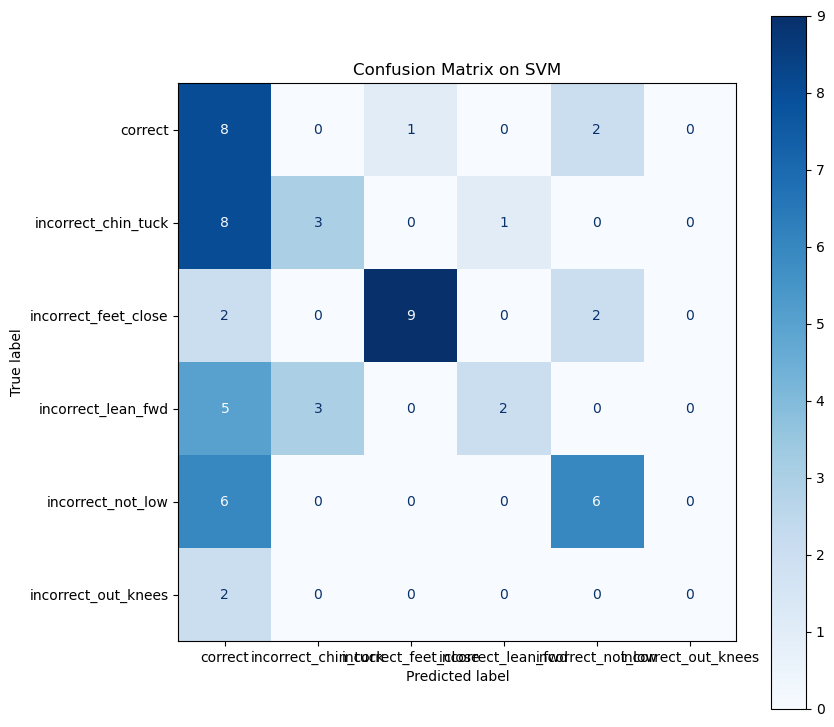

In [472]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on SVM")
title = "Confusion Matrix"

# Decision Tree

In [473]:
from sklearn.tree import DecisionTreeClassifier

In [483]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Accuracy: 0.5


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


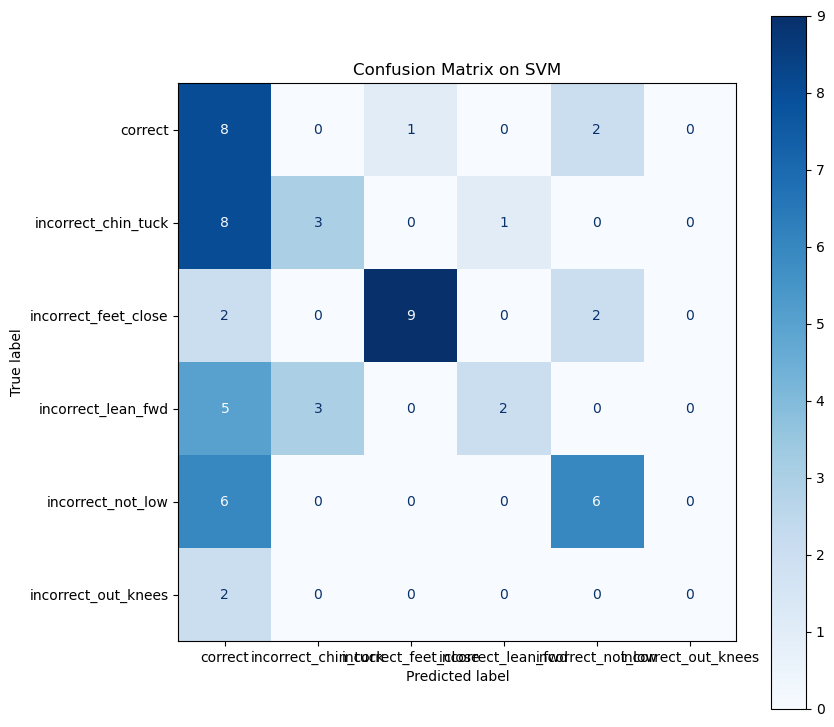

In [475]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix Decision tree")
title = "Confusion Matrix"

# KNN

In [476]:
from sklearn.neighbors import KNeighborsClassifier

In [477]:
clf = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 0.8983050847457628
Accuracy: 0.7166666666666667


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


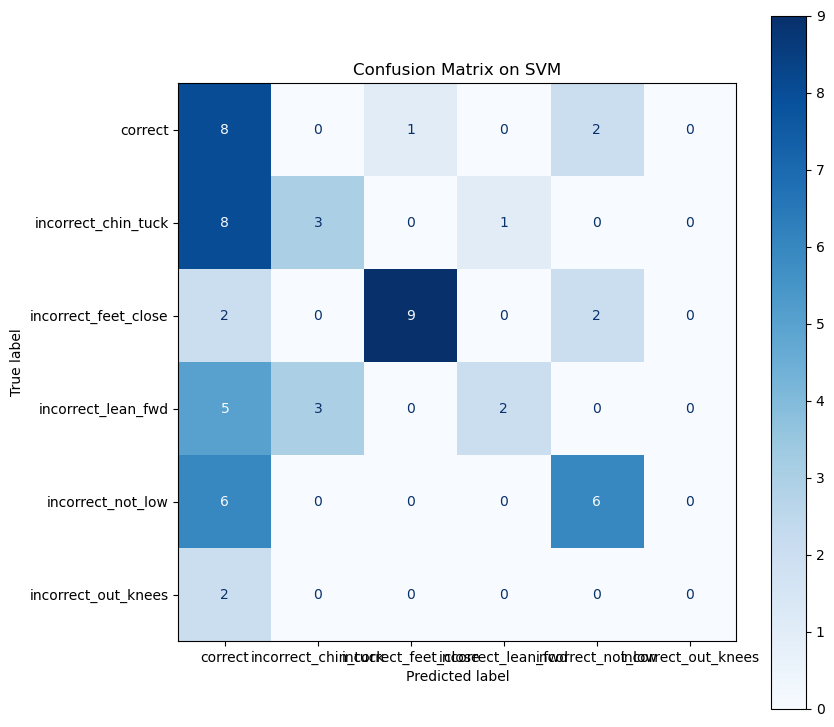

In [478]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on KNN")
title = "Confusion Matrix"

# ANN

In [479]:
from sklearn.neural_network import MLPClassifier

In [480]:
clf = MLPClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {clf.score(X_train, y_train)}")
print(f"Accuracy: {accuracy}")

Accuracy: 0.847457627118644
Accuracy: 0.65


/Users/jeffreylu/opt/anaconda3/envs/hmm/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


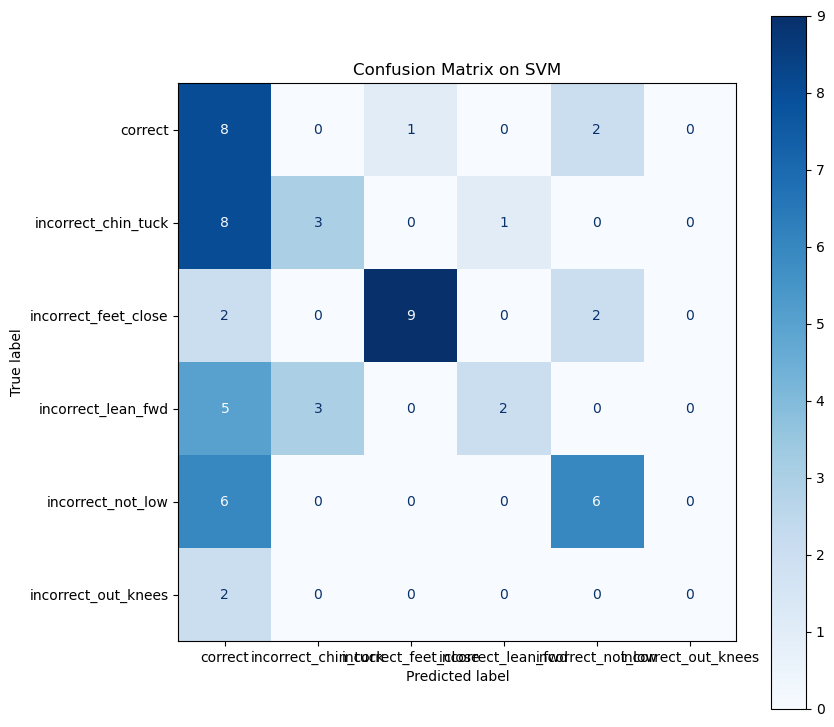

In [481]:
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(svm, X_test, y_test, ax=ax ,cmap ="Blues")
plt.title("Confusion Matrix on ANN")
title = "Confusion Matrix"